# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [ ]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

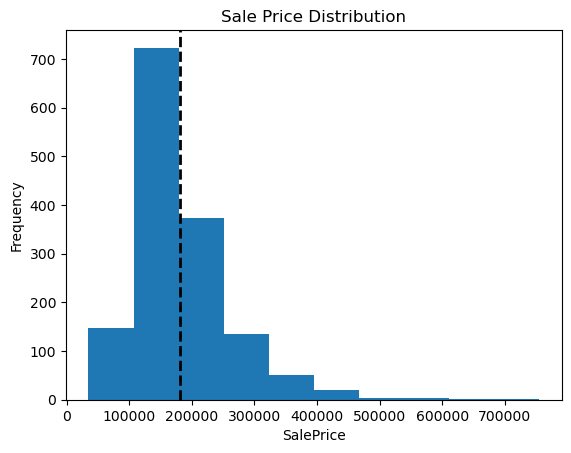

In [6]:
#Your code here 
# Ploting a SalePrice histogram
df['SalePrice'].plot(kind = 'hist');
#adding a vertical line for the mean 
plt.axvline(df['SalePrice'].mean(), color='black', linestyle='dashed', linewidth=2, label=f'Mean: {df['SalePrice'].mean():.2f}')
#labeling the x and y axis 
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
#adding the title of the graph 
plt.title('Sale Price Distribution')
plt.show()

Now, print out the mean, median, and standard deviation:

In [ ]:
# Your code here
# Mean value of sale price 
mean_value = df['SalePrice'].mean()
# median value of sale price 
median_value = df['SalePrice'].median()
#standard deviation of sale price 
std_dev = df['SalePrice'].std()

#Printing out the values 
print(f"Sale Price has a mean that is equal to {mean_value}")
print(f"Sale Price has a median that is equal to {median_value}")
print(f"Sale Price has a standard Deviation that is equal to {std_dev}")


Sale Price has a mean that is equal to 180921.19589041095
Sale Price has a meduian that is equal to 163000.0
Sale Price has a standard Deviation that is equal to 79442.50288288663


In the cell below, interpret the above information.

In [31]:
# Replace None with appropriate text
"""
The mean of the SalePrice column represents the average sale price of the homes in the dataset. Therefore the mean Average Sale Price lies at 180921.1959.However, since the mean can be influenced by outliers, the presence of a few very high-priced homes could cause this value to be higher than the majority of sale prices.
The median represents the middle value of the sale prices when they are ordered from low to high. Here, the median is $163,000, meaning that half of the homes sold for less than this amount, and half sold for more.The median being lower than the mean suggests that the distribution of sale prices is positively skewed, meaning that there are a few high-priced homes that are driving up the average price
The standard deviation measures the spread or variability of the sale prices around the mean. A standard deviation of $79,442.50 indicates that the sale prices are spread out relatively widely around the average

"""

'\nThe mean of the SalePrice column represents the average sale price of the homes in the dataset. Therefore the mean Average Sale Price lies at 180921.1959.However, since the mean can be influenced by outliers, the presence of a few very high-priced homes could cause this value to be higher than the majority of sale prices.\nThe median represents the middle value of the sale prices when they are ordered from low to high. Here, the median is $163,000, meaning that half of the homes sold for less than this amount, and half sold for more.The median being lower than the mean suggests that the distribution of sale prices is positively skewed, meaning that there are a few high-priced homes that are driving up the average price\nThe standard deviation measures the spread or variability of the sale prices around the mean. A standard deviation of $79,442.50 indicates that the sale prices are spread out relatively widely around the average\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

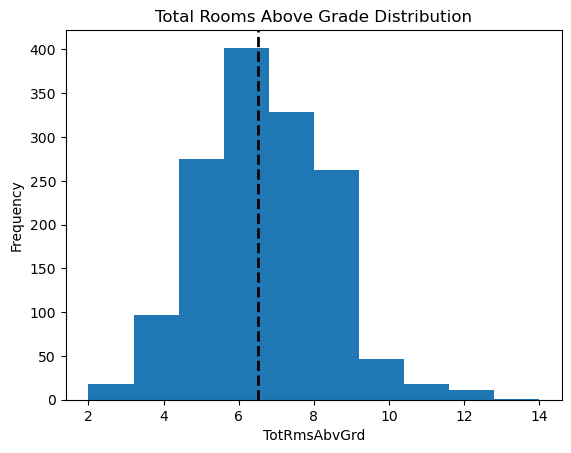

In [8]:
# Your code here
# Ploting a Total rooms above grade histogram
df['TotRmsAbvGrd'].plot(kind = 'hist');
#adding a vertical line for the mean 
plt.axvline(df['TotRmsAbvGrd'].mean(), color='black', linestyle='dashed', linewidth=2, label=f'Mean: {df['TotRmsAbvGrd'].mean():.2f}')
#labeling the x and y axis 
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')
#adding the title of the graph 
plt.title('Total Rooms Above Grade Distribution')
plt.show()

Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here
 #Mean value of total rooms above grade
mean_value = df['TotRmsAbvGrd'].mean()
# median value of total rooms above grade
median_value = df['TotRmsAbvGrd'].median()
#standard deviation of total rooms above grade
std_dev = df['TotRmsAbvGrd'].std()

#Printing out the values 
print(f"Total Rooms Above Grade has a mean that is equal to {mean_value}")
print(f"Total Rooms Above Grade has a meduian that is equal to {median_value}")
print(f"Total Rooms Above Grade has a standard Deviation that is equal to {std_dev}")


Total Rooms Above Grade has a mean that is equal to 6.517808219178082
Total Rooms Above Grade has a meduian that is equal to 6.0
Total Rooms Above Grade has a standard Deviation that is equal to 1.625393290584064


In the cell below, interpret the above information.

In [32]:
# Replace None with appropriate text
"""
The mean represents the average number of rooms above grade (above-ground levels) in the homes within the dataset.On average, homes have about 6.5 rooms above grade. This suggests that the homes in this dataset are relatively spacious, with a moderate number of rooms above ground.
The median represents the middle value of rooms above grade when sorted in ascending order. The median value of 6.0 means that half of the homes in the dataset have fewer than 6 rooms above grade, and half have more. This suggests that the dataset has many homes with around 6 rooms above ground.
The median being slightly lower than the mean suggests a small positive skew—there are a few homes with significantly more rooms that are pushing the mean higher.
The standard deviation measures the variability of the number of rooms above grade in the dataset.With a standard deviation of 1.63, this indicates that most homes have between 5 and 8 rooms above grade, though a few homes may have more or fewer rooms.
"""

'\nThe mean represents the average number of rooms above grade (above-ground levels) in the homes within the dataset.On average, homes have about 6.5 rooms above grade. This suggests that the homes in this dataset are relatively spacious, with a moderate number of rooms above ground.\nThe median represents the middle value of rooms above grade when sorted in ascending order. The median value of 6.0 means that half of the homes in the dataset have fewer than 6 rooms above grade, and half have more. This suggests that the dataset has many homes with around 6 rooms above ground.\nThe median being slightly lower than the mean suggests a small positive skew—there are a few homes with significantly more rooms that are pushing the mean higher.\nThe standard deviation measures the variability of the number of rooms above grade in the dataset.With a standard deviation of 1.63, this indicates that most homes have between 5 and 8 rooms above grade, though a few homes may have more or fewer rooms.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

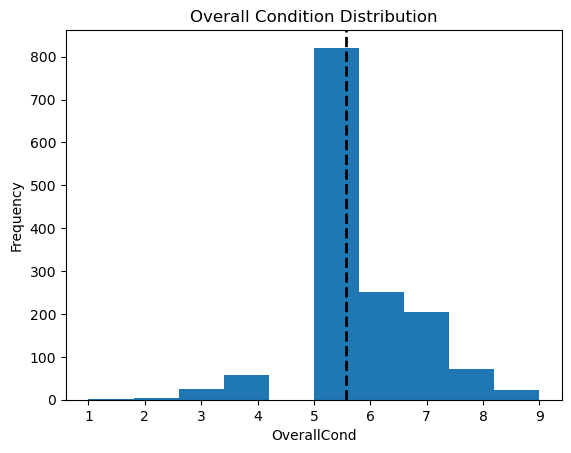

In [11]:
# Your code here
# Ploting a Overall condition histogram
df['OverallCond'].plot(kind = 'hist');
#adding a vertical line for the mean 
plt.axvline(df['OverallCond'].mean(), color='black', linestyle='dashed', linewidth=2, label=f'Mean: {df['OverallCond'].mean():.2f}')
#labeling the x and y axis 
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
#adding the title of the graph 
plt.title('Overall Condition Distribution')
plt.show()

Now, print out the mean, median, and standard deviation:

In [12]:
# Your code here
 #Mean value of Overall Condition
mean_value = df['OverallCond'].mean()
# median value of Overall Condition
median_value = df['OverallCond'].median()
#standard deviation of Overall Condition
std_dev = df['OverallCond'].std()

#Printing out the values 
print(f"Overall Condition has a mean that is equal to {mean_value}")
print(f"Overall Condition has a meduian that is equal to {median_value}")
print(f"Overall Condition has a standard Deviation that is equal to {std_dev}")

Overall Condition has a mean that is equal to 5.575342465753424
Overall Condition has a meduian that is equal to 5.0
Overall Condition has a standard Deviation that is equal to 1.1127993367127367


In the cell below, interpret the above information.

In [34]:
# Replace None with appropriate text
"""
The mean represents the average overall condition rating of the homes in the dataset, which is approximately 5.58.
This suggests that, on average, homes in the dataset are rated slightly above a condition of 5 on the scale
The median represents the middle value of the overall condition ratings when sorted in ascending order.
The median value of 5.0 indicates that 50% of the homes have a condition rating less than or equal to 5, and 50% have a rating above 5.
The mean being slightly higher than the median suggests a small positive skew, meaning there are a few homes with a condition rating greater than 5 that are pulling the mean higher.
The standard deviation measures the spread of the overall condition ratings around the mean.
With a standard deviation of 1.11, this indicates that most homes have an overall condition rating within one point of the mean between 4.47 and 6.69
"""

'\nThe mean represents the average overall condition rating of the homes in the dataset, which is approximately 5.58.\nThis suggests that, on average, homes in the dataset are rated slightly above a condition of 5 on the scale\nThe median represents the middle value of the overall condition ratings when sorted in ascending order.\nThe median value of 5.0 indicates that 50% of the homes have a condition rating less than or equal to 5, and 50% have a rating above 5.\nThe mean being slightly higher than the median suggests a small positive skew, meaning there are a few homes with a condition rating greater than 5 that are pulling the mean higher.\nThe standard deviation measures the spread of the overall condition ratings around the mean.\nWith a standard deviation of 1.11, this indicates that most homes have an overall condition rating within one point of the mean between 4.47 and 6.69\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [13]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [14]:
below_average_condition.shape[1]

80

In [15]:
below_average_condition.shape

(88, 80)

In [16]:
below_average_condition.shape[0]

88

In [17]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

In [18]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

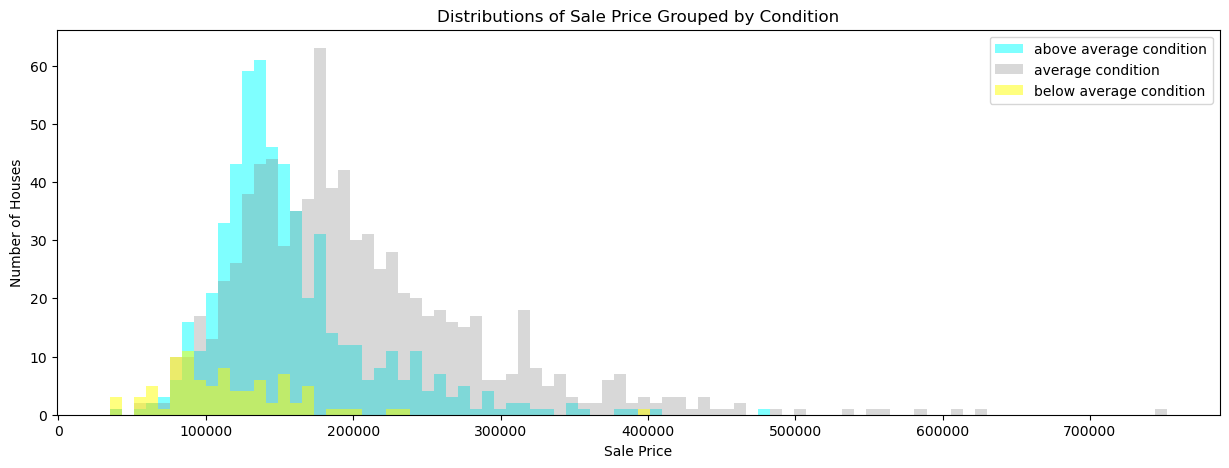

In [72]:
plt.show()

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [73]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [83]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [19]:
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')

In [20]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display the result
print(correlation_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

In [21]:
# Your code here
# Get the correlations with SalePrice, excluding SalePrice itself
correlations_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest positive correlation with SalePrice
most_positive_corr_column = correlations_with_saleprice.idxmax()
most_positive_corr_value = correlations_with_saleprice.max()
print(f"The column most positively correlated with SalePrice is '{most_positive_corr_column}' with a correlation of {most_positive_corr_value:.2f}")

The column most positively correlated with SalePrice is 'OverallQual' with a correlation of 0.79


Now, find the ***most negatively correlated*** column:

In [24]:
# Your code here
# Find the column with the highest negative correlation with SalePrice
most_negative_corr_column = correlations_with_saleprice.idxmin()
most_negative_corr_value = correlations_with_saleprice.min()

# Print the result
print(f"The column most negatively correlated with SalePrice is '{most_negative_corr_column}' with a correlation of {most_negative_corr_value:.2f}")

The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation of -0.14


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

In [39]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positive_corr_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negative_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Positive Correlation and Sale Price")
ax1.set_xlabel("Positive Correlation")
ax1.set_ylabel("Sale Price")
ax2.set_title("Negative Correlation and Sale Price")
ax2.set_xlabel("Negative Correlation")
ax2.set_ylabel("Sale Price");

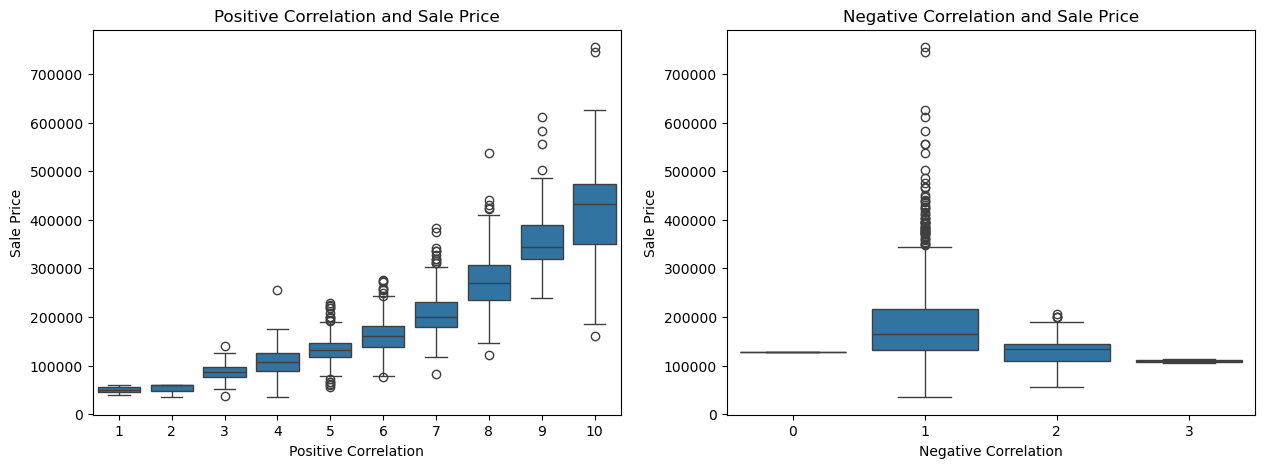

In [40]:
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [28]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

In [29]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

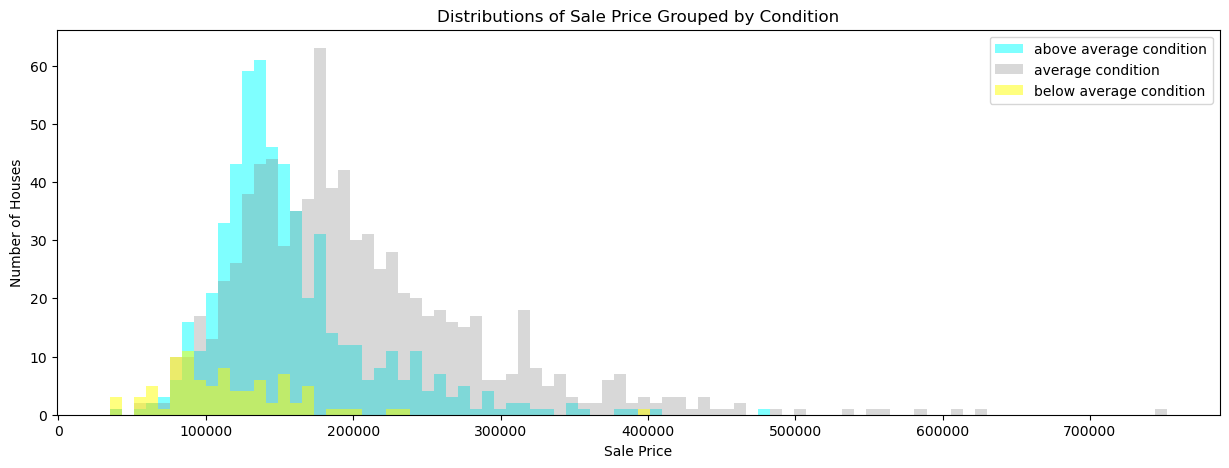

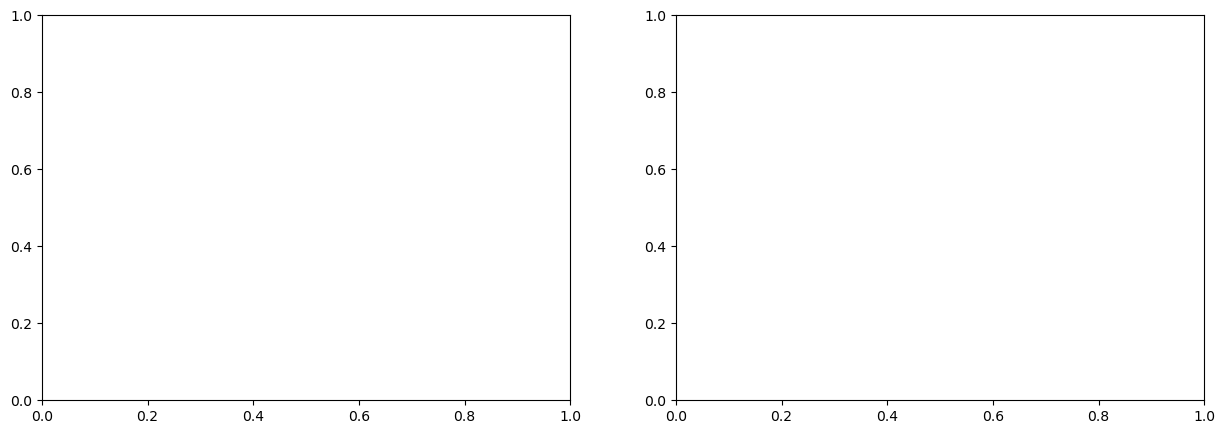

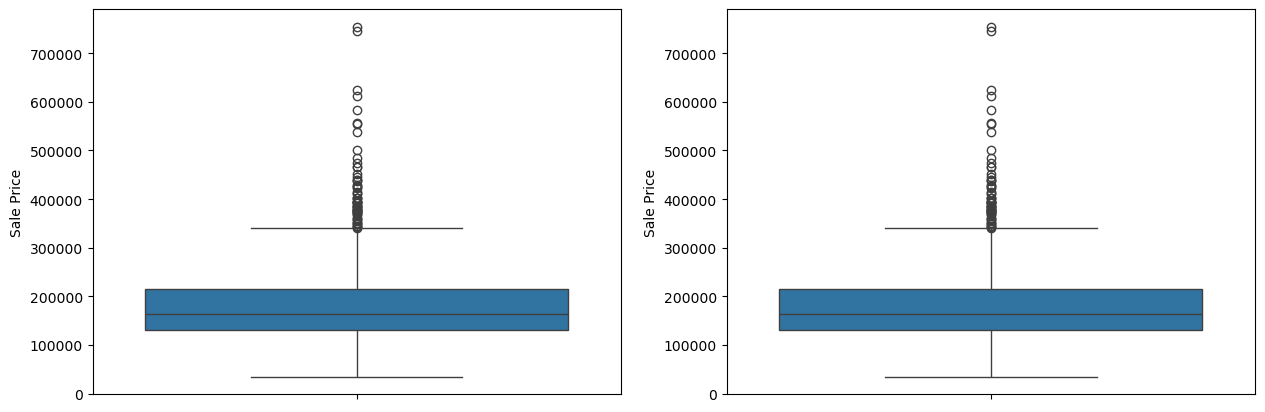

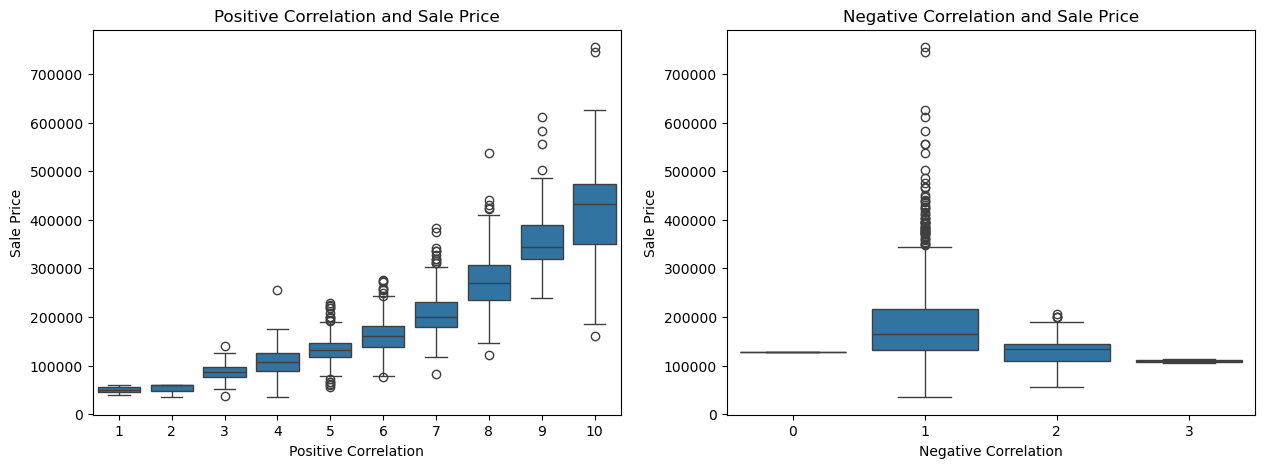

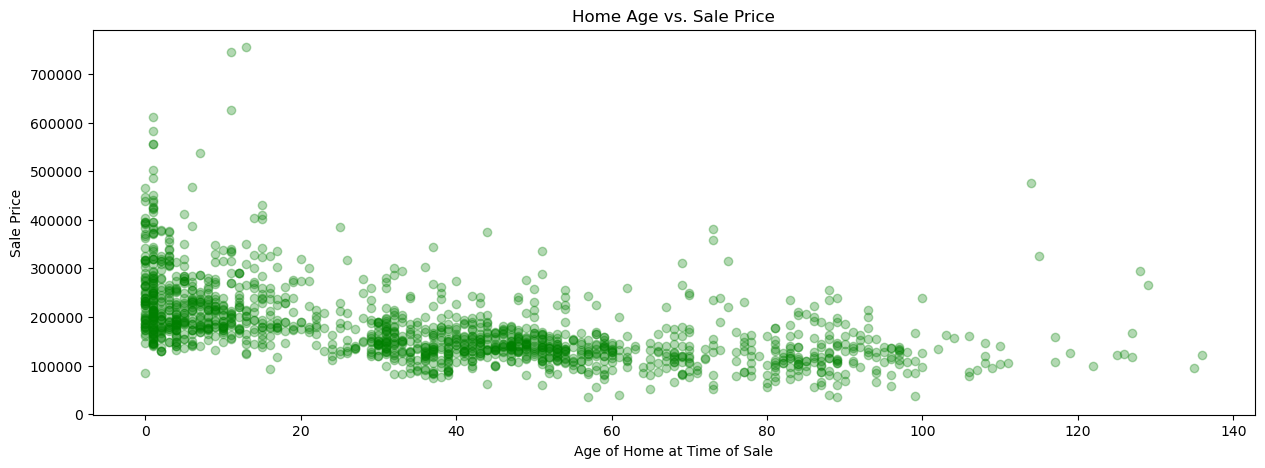

In [33]:
plt.show()

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
None
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.